In [1]:
import pandas as pd

In [2]:
# data = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/user_reviews.csv")
# data.to_csv("Reviews.csv")

data = pd.read_csv(r"D:\PFP\Projects\Advanced Projects\Google Play Store Sentiment Analysis\Reviews.csv")
data.head()


,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
data = data[["App", "Translated_Review", "Sentiment","Sentiment_Polarity", "Sentiment_Subjectivity"]]
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(37427, 5)

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()

In [8]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
data.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Positive,Negative,Neutral
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.808,0.0,0.192


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

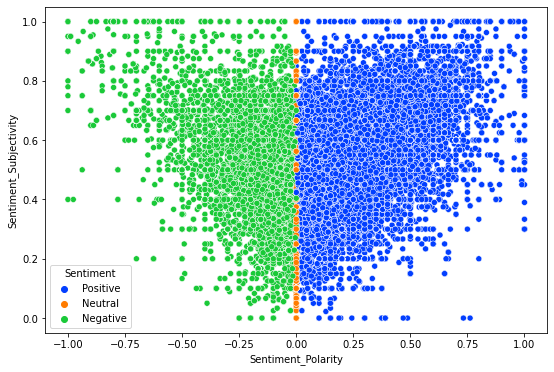

In [10]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data["Sentiment_Polarity"],y=data["Sentiment_Subjectivity"], hue=data["Sentiment"],palette="bright")
plt.show()